# 决策树

我一直觉得——决策树是传统统计机器学习中最有魅力的一个算法。因为它最像是模拟人类智能的程序，也就是最像人工智能。
## 从人类思考问题说起
### 挑选西瓜
假如说我们现在要买一个西瓜，但是我们面前有几百个西瓜，我们应该怎么调选呢?
假如我们有三个原则来辨别好坏瓜,分别是敲一下是不是响亮,观察光泽是否漂亮,以及瓜蒂是否饱满。
那么我们就可以通过三次是不是的问题来挑选西瓜，而面对着几百个西瓜，这三次判断又应该怎么做，才能最快的挑选出西瓜呢？


![watermelon.jpg](../images/watermelon.jpg)

### 一种快速挑选西瓜的方法

事实上确实存在一种快速挑选西瓜的方法，那就先从排除坏西瓜最多的问题开始判断。

假如我们目前有六百个西瓜对于三个条件：

 1. 声音响亮：声音响亮的三百个，不响亮的三百个
 2. 瓜蒂饱满：瓜蒂饱满的四百个，瓜蒂不饱满的两百个
 3. 光泽漂亮：光泽漂亮的两百个，不漂亮的四百个
 
那么很明显，我们应该先使用光泽漂亮这个条件进行判断，那么我们一次性就可以排出掉四百个西瓜，而对于剩下的四百个西瓜，情况如下：
 1. 声音响亮：声音响亮的一百五十个，不响亮的五十个个
 2. 瓜蒂饱满：瓜蒂饱满的二十个，瓜蒂不饱满的一百八十个
 
这是我们就应该使用瓜蒂饱满作为判断条件，这时还剩下二十个西瓜需要进行判断：

 1. 声音响亮：声音响亮的十个，不响亮的十个
 
这时我们只需要选择声音响亮的十个西瓜即可。

我们也可以用图形来表示我们之前的判断过程:

![决策树-买西瓜](../images/决策树-买西瓜.png)  

如果以表格形式表现我们之前的西瓜数据也就是:

| 特征 | yes | no |
|- | - |  - |
| 声音响亮  | 10 | 10 |
| 瓜蒂饱满  | 20 | 180 |
| 光泽漂亮  | 200 | 400 |

那么将其展开的话,是不是就变成了我们常见的数据集等形式。

| 特征 | 声音响亮(x1) | 瓜蒂饱满(x2) | 光泽漂亮(x3) | 好瓜(y) |
|- | - |  - | - | -| 
| demo1 | 0 | 0 | 0 | 0 |
| demo2 | 1 | 1 | 1 | 1 |
| demo3 | 0 | 0 | 1 | 0 |

**假如你们思考到这，那么至此恭喜你已经学会一半决策树了**

## 决策树简介

从本质上来说，决策树是一种使用if-then-else的决策规则的监督学习方法.

**其三要素为,枝节点,叶节点与分支条件,同时为了减少过拟合还有剪枝方法**
**为了便于记忆,可以称其为一方法三要素**

在上个例子中，枝节点就是蓝色的未分类的西瓜集合，红色和绿色就是叶节点，分支条件则是三个判断条件。
对于真正的决策树而言，目前只有分支条件是不同的，因为对于机器学习而言，我们肯定不能一个个的去添加判断条件。这对于成百上千条数据而言就已经足够复杂了，何况目前已经是大数据时代了。
而借助数学武器，我们确实拥有更好地方式编写自动化的分支条件。

### 信息熵

*有一半的人认为香农和爱因斯坦一样是世界上最伟大的科学家,而另外一半人认为香农比爱因斯坦更加伟大(在香农实验室里)*

对于数据而言我们有一个更好地方式来描绘信息的复杂程度,那就是**信息熵**.这是香农所创建的信息论中一个极其重要的概念。

#### 以信息论的角度来说说信息熵

通常，一个信源发送出什么符号是不确定的，衡量它可以根据其出现的概率来度量。概率大，出现机会多，不确定性小；反之不确定性就大。不确定性函数f是概率P的减函数；**两个独立符号所产生的不确定性应等于各自不确定性之和**，即f(P1,P2)=f(P1)+f(P2)，这称为可加性。同时满足这两个条件的函数f是对数函数，即$f(p) = log \frac{1}{p} = -logp $ 。

在信源中，考虑的不是某一单个符号发生的不确定性，而是要考虑这个信源所有可能发生情况的平均不确定性。若信源符号有n种取值：U1…Ui…Un，对应概率为：P1…Pi…Pn，且各种符号的出现彼此独立。这时，信源的平均不确定性应当为单个符号不确定性-logPi的统计平均值（E），可称为**信息熵**，即 $$H(U)=- \sum_{i=1}^n P(x_i ) log_2 P(x_i )   $$ ，式中对数一般取2为底，单位为比特。但是，也可以取其它对数底，采用其它相应的单位，它们间可用换底公式换算。


而既然要选择对信息混乱程度减少贡献最大的特征，我们就需要对选择该特征划分前后，信息熵的变化进行计算

因此得到信息熵公式:

$g(D,A)=H(D)-H(D│A)$求出。


其中$g(D,A)$表示信息增益，H(D)表示经验熵，H(D│A)表示在给定条件下的经验熵。（这里采用的是李航的公式写法）

### 决策树的构造

决策树学习的算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割，使得各个子数据集有一个最好的分类的过程。这一过程对应着对特征空间的划分，也对应着决策树的构建。

1） 开始：构建根节点，将所有训练数据都放在根节点，选择一个最优特征，按着这一特征将训练数据集分割成子集，使得各个子集有一个在当前条件下最好的分类。

2） 如果这些子集已经能够被基本正确分类，那么构建叶节点，并将这些子集分到所对应的叶节点去。

3）如果还有子集不能够被正确的分类，那么就对这些子集选择新的最优特征，继续对其进行分割，构建相应的节点，如果递归进行，直至所有训练数据子集被基本正确的分类，或者没有合适的特征为止。

4）每个子集都被分到叶节点上，即都有了明确的类，这样就生成了一颗决策树。

### 其他划分方式
#### 信息增益比
根据最佳特征选择方式的不同，我们将决策树分为不同的决策树算法。
假如我们在构建决策树的过程中使用了刚刚介绍的划分方式：信息增益，那么决策树构建算法则被称为ID3。

不过思考一下，我们其实还可以对信息增益进行一定的改进,比如使用信息增益相对原信息熵的比值: $ G_R(D│A)= \frac{(H(D)-H(D│A))}{H(
D)} $,从一个角度来说单纯的信息增益只是个相对值，它过度依赖于H(D)的大小，所以信息增益比能够比信息增益更客观地反映划分前后信息熵的变化。
#### 基尼系数
基尼不纯度是指将来自集合中的某种结果随机应用于集合中某一数据项的预期误差率。如何集合中的每一个数据项都属于同一分类，那么推测的结果总会是正确的，因此误差率是 0；如果有 2种可能的结果均匀分布在集合内，出错可能性是50%，基尼不纯度为 0.50。该值越高，说明拆分的越不理想，如果该值为 0，说明完美拆分。具体公式如下:
$$Gini=\sum_{i=1}^n P_i (1-p_i ) $$

#### 比较
**信息增益 vs 信息增益比**

之所以引入了信息增益比，是由于信息增益的一个缺点。那就是：信息增益总是偏向于选择取值较多的属性。信息增益比在此基础上增加了一个罚项，解决了这个问题。

**Gini 指数 vs 熵**

既然这两个都可以表示数据的不确定性，不纯度。那么这两个有什么区别那？

Gini 指数的计算不需要对数运算，更加高效；

Gini 指数更偏向于连续属性，熵更偏向于离散属性。

## 带入数值计算

三种计算方法分别对应着三种决策树：信息增益（ID3 算法）、信息增益率（C4.5 算法）以及基尼指数（Cart 算法）。

假如我们目前有六百个西瓜对于三个条件：

 1. 声音响亮：声音响亮的三百个，不响亮的三百个
 2. 瓜蒂饱满：瓜蒂饱满的四百个，瓜蒂不饱满的两百个
 3. 光泽漂亮：光泽漂亮的两百个，不漂亮的四百个
 
 信息熵：
 
$$H(U)=- \sum_{i=1}^n P(x_i ) log_2 P(x_i )   $$


In [4]:
import math

entropy_1 = -(1/2)*math.log(0.5,2)-(1/2)*math.log(0.5,2)
print("entropy_1 : ",entropy_1)

entropy_2 = -(2/3)*math.log(2/3,2)-(1/3)*math.log(1/3,2)
print("entropy_2 : ",entropy_2)

entropy_3 = -(2/3)*math.log(2/3,2)-(1/3)*math.log(1/3,2)
print("entropy_2 : ",entropy_3)

entropy_1 :  1.0
entropy_2 :  0.9182958340544896
entropy_2 :  0.9182958340544896


- 声音响亮的西瓜中，好瓜有十个，不响亮的有零个
- 瓜地饱满的西瓜中，好瓜有十个，不饱满的有零个
- 光泽漂亮的西瓜中，好瓜有十个，不饱满的有零个

In [8]:
entropy_1_1 = - (1/30)*math.log(1/30,2) - (29/30)*math.log(29/30,2)
entropy_1_2 = 0
print("entropy_1_1 : ",entropy_1_1)

gain_1 = entropy_1-(1/2*(entropy_1_1)+1/2*(entropy_1_2))
print("gain_1 :",gain_1)

entropy_1_1 :  0.21084230031853213
gain_1 : 0.8945788498407339


In [9]:
entropy_2_1 = - (1/40)*math.log(1/40,2) - (39/40)*math.log(39/40,2)
entropy_2_2 = 0
print("entropy_2_1 : ",entropy_2_1)

gain_2 = entropy_2-(2/3*(entropy_2_1)+1/3*(entropy_2_2))
print("gain_2 :",gain_2)

entropy_2_1 :  0.16866093149667025
gain_2 : 0.8058552130567094


In [10]:
entropy_3_1 = - (1/20)*math.log(1/20,2) - (19/20)*math.log(19/20,2)
entropy_3_2 = 0
print("entropy_3_1 : ",entropy_3_1)

gain_3 = entropy_3-(1/3*(entropy_3_1)+2/3*(entropy_3_2))
print("gain_3 :",gain_3)

entropy_3_1 :  0.28639695711595625
gain_3 : 0.8228301816825041


**信息增益比：**

In [11]:
Gain_ratio_1 = gain_1/entropy_1
Gain_ratio_2 = gain_2/entropy_2
Gain_ratio_3 = gain_3/entropy_3

print("Gain_ratio_1 :",Gain_ratio_1)
print("Gain_ratio_2 :",Gain_ratio_2)
print("Gain_ratio_3 :",Gain_ratio_3)

Gain_ratio_1 : 0.8945788498407339
Gain_ratio_2 : 0.8775551224039331
Gain_ratio_3 : 0.896040416571986


**基尼系数：**

In [5]:
gini_1 =  10/300 * (1-10/300) + 0*0
gini_2 =  10/400 * (1-10/400) + 0*0
gini_3 =  10/200 * (1-10/200) + 0*0
print("gini_1 : ",gini_1)
print("gini_2 : ",gini_2)
print("gini_3 : ",gini_3)

gini_1 :  0.03222222222222222
gini_2 :  0.024375
gini_3 :  0.0475


## 决策树的优缺点
### 决策树的优势

 - 便于理解和解释。树的结构可以可视化出来。
 - 训练需要的数据少。其他机器学习模型通常需要数据规范化，比如构建虚拟变量和移除缺失值。
 - 由于训练决策树的数据点的数量导致了决策树的使用开销呈指数分布(训练树模型的时间复杂度是参与训练数据点的对数值)。
 - 能够处理数值型数据和分类数据。其他的技术通常只能用来专门分析某一种变量类型的数据集。详情请参阅算法。
 - 能够处理多路输出的问题。
 - 使用白盒模型。如果某种给定的情况在该模型中是可以观察的，那么就可以轻易的通过布尔逻辑来解释这种情况。相比之下，在黑盒模型中的结果就是很难描述清楚。
 - 可以通过数值统计测试来验证该模型。这使得对解释验证该模型的可靠性成为可能。
 - 即使该模型假设的结果与真实模型所提供的数据有些违反，其表现依旧良好。

### 决策树的缺点
 - 决策树模型容易产生一个过于复杂的模型,这样的模型对数据的泛化性能会很差。这就是所谓的过拟合.一些策略像剪枝、设置叶节点所需的最小样本数或设置数的最大深度是避免出现 该问题最为有效地方法。
 - 决策树可能是不稳定的，因为数据中的微小变化可能会导致完全不同的树生成。这个问题可以通过决策树的集成来得到缓解
 - 在多方面性能最优和简单化概念的要求下，学习一棵最优决策树通常是一个NP难问题。因此，实际的决策树学习算法是基于启发式算法，例如在每个节点进 行局部最优决策的贪心算法。这样的算法不能保证返回全局最优决策树。这个问题可以通过集成学习来训练多棵决策树来缓解,这多棵决策树一般通过对特征和样本有放回的随机采样来生成。
 - 有些概念很难被决策树学习到,因为决策树很难清楚的表述这些概念。例如XOR，奇偶或者复用器的问题。
 - 如果某些类在问题中占主导地位会使得创建的决策树有偏差。因此，我们建议在拟合前先对数据集进行平衡。
 
## 分类

In [15]:
%matplotlib inline
import numpy as np
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

**predict the class of samples**

In [2]:
print(clf.predict([[2,2]]))

[1]


**show the probability and log_probability of each class be predicted**

In [3]:
print(clf.predict_proba([[2,2]]))
print(clf.predict_log_proba([[2,2]]))

[[0. 1.]]
[[-inf   0.]]


D:\Anaconda\lib\site-packages\sklearn\tree\tree.py:890: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


在刚开始的时候我提出了三要素一方法,其中三要素不仅对应着决策树的构成方式,还对应着一方法也就是剪枝

决策树因为其实算法的特殊性,除非存在不同的两个点或者以上在完全一致的特征下,分类标签不一致的情况,
决策树可以做到对数据集的完全拟合.也正是决策树的这一特性,使得完全的决策树会产生严重的过拟合.

因此我们需要减掉过多的分支,从而提高决策树的泛化能力.其中的方法虽然很多,但是整体而言都是围绕着枝节点与叶节点展开的

在sklearn中我们可以用来提高决策树泛化能力的超参数主要有
 - max_depth:树的最大深度,也就是说当树的深度到达max_depth的时候无论还有多少可以分支的特征,决策树都会停止运算.
 - min_samples_split: 分裂所需的最小数量的节点数.当叶节点的样本数量小于该参数后,则不再生成分支.该分支的标签分类以该分支下标签最多的类别为准
 - min_samples_leaf; 一个分支所需要的最少样本数,如果在分支之后,某一个新增叶节点的特征样本数小于该超参数,则退回,不再进行剪枝.退回后的叶节点的标签以该叶节点中最多的标签你为准
 - min_weight_fraction_leaf: 最小的权重系数
 - max_leaf_nodes:最大叶节点数,None时无限制,取整数时,忽略max_depth
    

## 分支方式
对于决策树而言,常见的决策树分支方式一共有三种,前两种是基于信息熵的,ID3(信息增益),C4.5(信息增益比),以及基于基尼系数的CART决策树

但是因为到目前为止,sklearn中只实现了ID3与CART决策树,所以我们暂时只能使用这两种决策树,分支方式由超参数criterion决定:

  - gini:默认参数,基于基尼系数
  - entropy: 基于信息熵,也就是我们的ID3
     
**下面在鸢尾花数据集上使用分类决策树**

**加载数据**

首先使用随机分割方法来创建数据集：

In [13]:
from sklearn import datasets, model_selection

iris = datasets.load_iris()  # scikit-learn 自带的 iris 数据集
X_train = iris.data
y_train = iris.target


# 随机分割
X_train,X_test,y_train,y_test = model_selection.train_test_split(  \
     X_train, y_train,test_size=0.25, random_state=0, stratify=y_train)

之后使用fit方法来训练，predict来进行预测。

In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pre = clf.predict(X_test)

right = 0
for i in range(len(y_pre)):
    if y_pre[i]==y_test[i]:
        right+=1
        
print(right/len(y_pre))

0.9473684210526315


**使用基尼(CART决策树)与信息熵(ID3)进行测试,可以发现在iris dataset上,gini的表现要好一些**
    
**同时可以发现,对于决策树而言,完全拟合数据并不困难,最多只需要 log(n_samples)即可,对于iris的150个样本而言,只需要max_depth就足够了,但是max_depth的过度提高一般代表着泛化能力的降低**

这里我们可以使用内置的函数score（一般翻译为分数，实际调用的是决定系数，不等于概率），该函数是所有sklearn机器学习模型都有的一个函数。

In [24]:
criterions=['gini','entropy']
for criterion in criterions:
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    clf.fit(X_train, y_train)
    print(criterion,"Training score:%f"%(clf.score(X_train,y_train)))
    print(criterion,"Testing score:%f"%(clf.score(X_test,y_test)))

gini Training score:1.000000
gini Testing score:0.973684
entropy Training score:1.000000
entropy Testing score:0.947368


### 评估函数

我们可以像之前一样自己来编写评估函数，也可以直接调用sklearn中各种已经封装好的评估函数，位于metrics模块。

metrics模块中用于分类的评估函数

- accuracy_score
- balanced_accuracy_score
- classification_report
- cohen_kappa_score
- confusion_matrix
- f1_score
- fbeta_score
- hamming_loss
- hinge_loss
- jaccard_score
- log_loss
- matthews_corrcoef
- precision_recall_fscore_support
- precision_score
- recall_score
- zero_one_loss
- brier_score_loss
- multilabel_confusion_matrix

具体的使用方法为function_name(test_target, prediction)

In [34]:
from sklearn.metrics import accuracy_score, zero_one_loss
import numpy as np

test_target = y_test
prediction = y_pre

print("accuracy_score： ", accuracy_score(test_target, prediction))
print("zero_one_loss： ", zero_one_loss(test_target, prediction))

accuracy_score：  0.9473684210526315
zero_one_loss：  0.052631578947368474


In [38]:
# 顺便展示一下舍入误差
acc = accuracy_score(test_target, prediction)
zol = zero_one_loss(test_target, prediction)

print(acc)
print(zol)
print(acc+zol)

0.9473684210526315
0.052631578947368474
1.0


In [39]:
print(type(acc))
print(type(zol))
print(type(acc+zol))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


### 分类决策树的参数

使用算法很容易，用好算法很困难。对于单个模型而言，当数据确定是，真正决定模型好坏的便是超参数。

sklearn中分类决策树所带有的超参数如下：

 - criterion{“gini”, “entropy”}, 默认为”gini”;分割判断标准,基尼或者信息熵
 
 - splitter{“best”, “random”}, 默认为”best”;分割策略,最佳或者随机
 
 - max_depth:int, 默认为None;树的最大深度,直到所有叶子都是纯净的,或者直到所有叶子都包含至少min_samples_split个样本。
 
 - min_samples_split:int or float, 默认为2;拆分内部节点所需的最少样本数,如果为整数则表示最小样本数,如果为float则表示百分比,ceil(min_samples_split * n_samples)
 
 - min_samples_leaf:int or float, 默认为1;在叶节点处需要的最小样本数。仅在任何深度的分裂点在min_samples_leaf左分支和右分支中的每个分支上至少留下训练样本时，才考虑。这可能具有平滑模型的效果，尤其是在回归中。如果为整数则表示最小样本数,如果为float则表示百分比ceil(min_samples_leaf*min_samples_leaf)
 
 - min_weight_fraction_leaf:float, 默认为0.0;在所有叶节点处（所有输入样本）的权重总和中的最小加权分数。如果未提供sample_weight，则样本的权重相等。
 
 - max_features:int, float or {“auto”, “sqrt”, “log2”}, 默认为None;寻找最佳分割时要考虑的功能数量：如果为int，则max_features在每个拆分处考虑要素。如果为float，max_features则为小数，并 在每次拆分时考虑要素。int(max_features * n_features)。如果“自动”，则max_features=sqrt(n_features)。如果是“ sqrt”，则max_features=sqrt(n_features)。如果为“ log2”，则为max_features=log2(n_features)。如果没有，则max_features=n_features。注意：直到找到至少一个有效的节点样本分区，分割的搜索才会停止，即使它需要有效检查多个max_features要素也是如此。
 
 - random_state:int, RandomState instance, 默认为None;随机数种子
 
 - max_leaf_nodes:int, 默认为None;以最佳的方式建立树。最佳节点定义为杂质的相对减少。如果为None，则叶节点数不受限制。
 
 - min_impurity_decrease:float, 默认为0.0;如果节点分裂导致杂质减少大于或等于该值，则该节点将分裂。
 
 - min_impurity_split：float, 默认为0;树木生长尽早停止的阈值。如果节点的杂质高于阈值，则该节点将分裂，否则为叶。将于0.25删除
 
 - class_weight:dict, list of dict or “balanced”, 默认为None。与形式的类有关的权重。“平衡”模式使用y的值来自动调整与输入数据中的类频率成反比的权重，如下所示： n_samples / (n_classes * np.bincount(y))。对于多输出，y的每一列的权重将相乘。请注意，如果指定了sample_weight，则这些权重将与sample_weight（通过fit方法传递）相乘。
 
 - presort:deprecated, 默认为’deprecated’;弃用，并将在v0.24删除
 
 - ccp_alpha:non-negative float, 默认为0.0;用于最小化成本复杂性修剪的复杂性参数。具有最大成本复杂度的子树小于ccp_alpha所选择的子树 。默认情况下，不执行修剪。

**现在我们控制其中的一个超参数，来看一下，随着超参数变化，模型结果是否会随之改变。**

*下面是绘制的train_error 与test_error曲线,你也可容易通过修改其他几个可以控制枝节点与叶节点的超参数对决策树的生成进行控制**

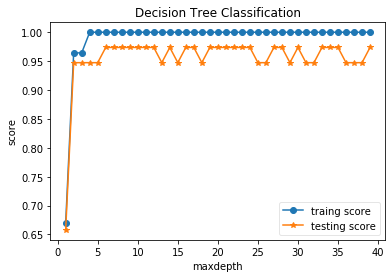

In [6]:
import matplotlib.pyplot as plt
maxdepth = 40

X_train,X_test,y_train,y_test=load_data()
depths=np.arange(1,maxdepth)
training_scores=[]
testing_scores=[]
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train,y_train))
    testing_scores.append(clf.score(X_test,y_test))

## 绘图
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(depths,training_scores,label="traing score",marker='o')
ax.plot(depths,testing_scores,label="testing score",marker='*')
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.set_title("Decision Tree Classification")
ax.legend(framealpha=0.5,loc='best')
plt.show()

# 绘制出决策树
经过训练的决策树，我们可以使用 export_graphviz 导出器以 Graphviz 格式导出决策树. 如果你是用 conda 来管理包，那么安装 graphviz 二进制文件和 python 包可以用以下指令安装

`
conda install python-graphviz
`

或者，可以从 graphviz 项目主页下载 graphviz 的二进制文件，并从 pypi 安装 Python 包装器，并安装 'pip install graphviz` .以下是在整个 iris 数据集上训练的上述树的 graphviz 导出示例; 其结果被保存在 iris.pdf 中:

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf_iris = tree.DecisionTreeClassifier()
clf_iris = clf.fit(iris.data, iris.target)

**下面的代码可以到处我们的决策树**

**:func:`export_graphviz` 出导出还支持各种美化，包括通过他们的类着色节点（或回归值），如果需要，使用显式变量和类名。**

**默认情况下,会导出图形文件**

**更详细的内容请参考 [sklearn官方文档:sklearn.tree.export_graphviz](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz)**

**Jupyter notebook也可以自动找出相同的模块**

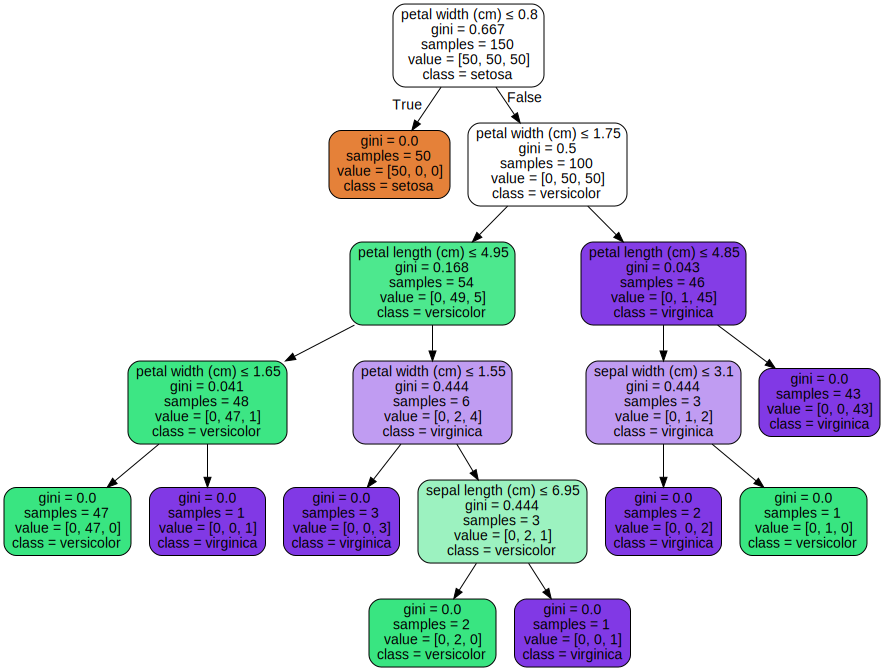

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'F:/Graphviz/bin'
import graphviz # doctest: +SKIP
dot_data = tree.export_graphviz(clf, out_file=None) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("iris") # doctest: +SKIP


dot_data = tree.export_graphviz(clf, out_file=None, # doctest: +SKIP
                            feature_names=iris.feature_names,  # doctest: +SKIP
                            class_names=iris.target_names,  # doctest: +SKIP
                            filled=True, rounded=True,  # doctest: +SKIP
                            special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)  # doctest: +SKIP
graph # doctest: +SKIP

我们也可以查看pdf文件,下面是pdf文件转化为图片之后的结果:
![决策树](../images/iris.PNG)

**之后依旧可以使用该函数进行预测数据等操作**

In [9]:
clf_iris.predict(iris.data[:1, :]) 

array([0])

另外还需要一个Python的pydotplus库，安装的方法是打开Anaconda命令，直接输入`pip install pydotplus `回车即可。把数据参数传进去并指定画图的颜色，然后就可以把图画出来，完成决策树的可视化的过程。

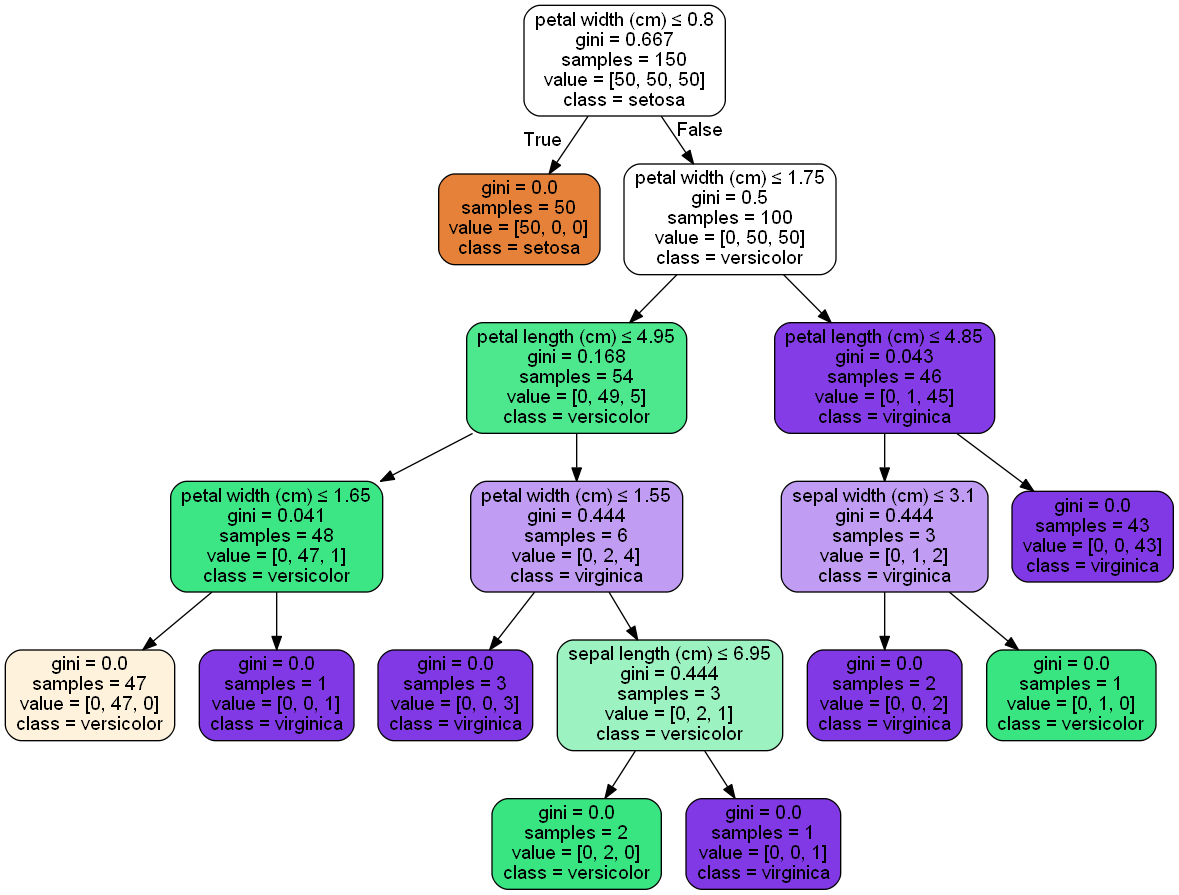

In [10]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

# 画出决策树的分类区域

 - [sklearn对应文档](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py)

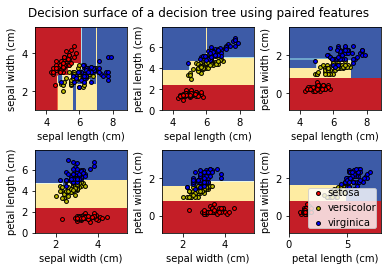

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 参考资料

 - [sklearn官方文档:决策树](http://scikit-learn.org/stable/modules/tree.html)
 - [sklearn官方文档:绘制决策树](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py)
 - [sklearn官方文档:sklearn.tree.export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz)